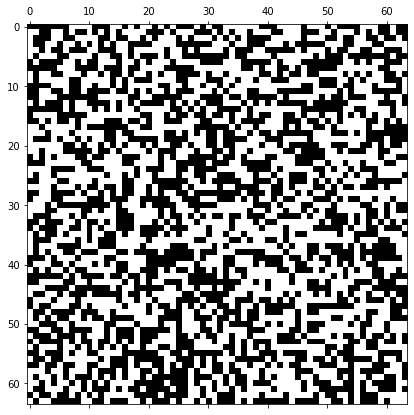

In [20]:
import numpy as np
import matplotlib.pyplot as plt


N = 64

lattice = np.random.random(size=(N,N))
lat = -1*(lattice>0.5)+1*(lattice<0.5)

fig, ax = plt.subplots(figsize=(7,7))
ax.matshow(lat,cmap='gray')
plt.show()

So here, we just initialized a lattice which has 'even' amounts of +1 and -1 scattered all throughout the lattice. We did this by making all the random values become -1 or +1 (about 50% for each).

So first, we have
$$ H(J,\beta) = -\sum_{\langle{s_i,s_j}\rangle}Js_is_j - B\sum_{i}s_i$$
which is the main formula to be used for almost everything.

# 1.

In [21]:
def current_hamiltonian(array, J, h):

    pairwise = 0

    for i in range(N):
        for j in range(N):
            center = array[i, j]
            left = array[(i-1)%N,j]
            right = array[(i+1)%N,j]
            top = array[i,(j+1)%N]
            bottom = array[i,(j-1)%N]

            pairwise += center*top + center*bottom + center*left + center*right

    bias = np.sum(array)

    return -J*pairwise -h*bias 

current_hamiltonian(lat, 5, 0)

-520

# 2. 

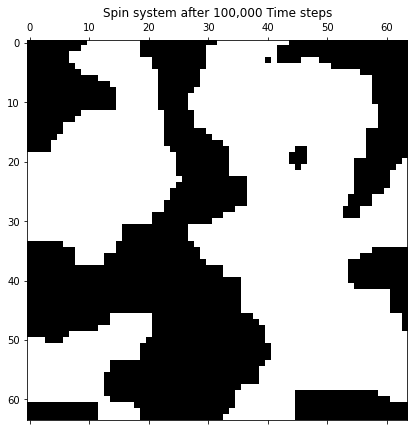

In [22]:
T = 1
beta = 1/T
J = 5
h = 0
energies = []
magnetization = []


def flipping(lat):
    
    m = np.random.choice(np.arange(N))
    n = np.random.choice(np.arange(N))

    E_new = lat.copy()
    E_new[m][n] *= -1
    
    c = E_new[m,n]
    r = lat[(m+1)%N,n]
    l = lat[(m-1)%N,n]
    t = lat[m,(n+1)%N]
    b = lat[m,(n-1)%N]

    dE = -J*(t*c + r*c + l*c + b*c)-h*c
    
    Pa = np.exp(-dE*beta)
    if dE <= 0:
        return E_new
            
    elif Pa>np.random.random():
        return E_new
    return lat


for a in np.arange(100000):
    lat = flipping(lat)
    if a % 1000 == 0:
        energies.append(current_hamiltonian(lat, J, h))
        magnetization.append(np.sum(lat))

fig, ax = plt.subplots(figsize=(7,7))
ax.matshow(lat,cmap='gray')
ax.set(title='Spin system after 100,000 Time steps')
plt.show()

It can be seen that due to the influence of the surrounding adjacent points, like charges tend to stick together, somewhat like a 'spontaneous magnetization'.

After much tinking around with the values, here are some observations I have found.

Increasing the temperature (decreasing $\beta$ since $\beta = 1/T k_B$ and we set $k_B = 1$), makes the lattice more random and less prone to the like charges sticking. This is because increasing the temperature decreases the value of $e^{-\beta \Delta{E}}$, which means if the initial switch is non-negative, there is a much lower chance of generating a random value (from 0 to 1) that is less than $e^{-\beta \Delta{E}}$ which makes it acceptable to switch. Therefore, at high temperatures, there is a very high chance that only 1 switch is allowed for all the points. The opposite is true for lower temperatures (greater value of $e^{-\beta \Delta{E}}$ which causes more random numbers to fit the conditions for switch after the initial flip).

Increasing the value of J also helps achieve the like charges to stick together faster. This is because we are increasing the constant of the pairwise part. The adjacent points help the center to achieve a much more faster spontaneous sticking due to the increased constant.

# 3.

[Text(0.5, 0, 't'),
 Text(0, 0.5, 'm'),
 Text(0.5, 1.0, 'Magnetization as a function of Monte Carlo sweeps with N=64 and T=1K')]

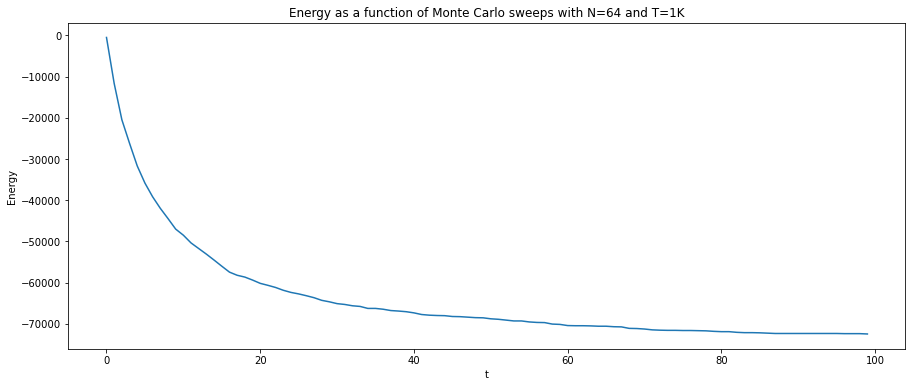

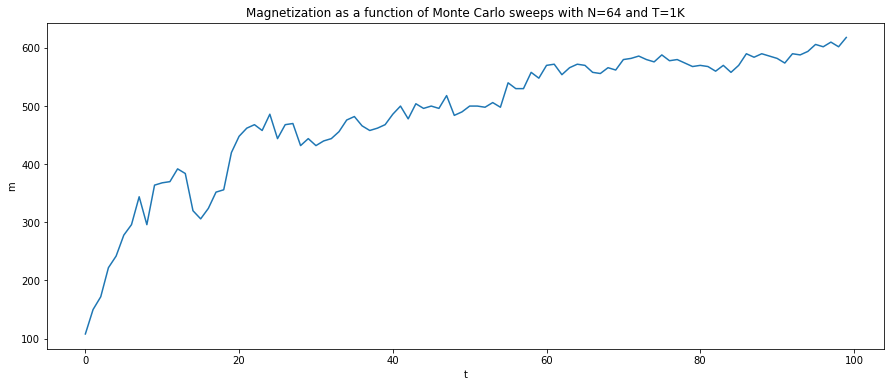

In [23]:
fig1, ax1 = plt.subplots(figsize=(15,6))
ax1.plot(np.arange(len(energies)),energies)
ax1.set(xlabel='t',ylabel='Energy',title="Energy as a function of Monte Carlo sweeps with N=64 and T=1K")

fig2, ax2 = plt.subplots(figsize=(15,6))
ax2.plot(np.arange(len(magnetization)),magnetization)
ax2.set(xlabel='t',ylabel='m',title="Magnetization as a function of Monte Carlo sweeps with N=64 and T=1K")